In [6]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline
import glob

In [11]:
directory = '/Users/Rachel Veenstra/Desktop/Coding/introcoding-spring-2019/Datasets/'

glob.os.chdir(directory)

In [12]:
# cosine curve - mean, amplitude, wavelength, frequency

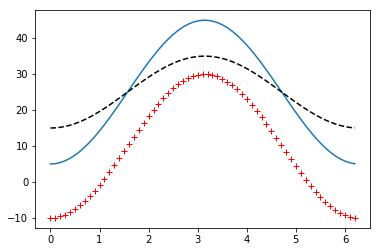

In [22]:
x = np.arange(0, 2*np.pi, 0.1)
super_simple_wave = lambda x, a, b: a + b * -(np.cos(x))

plt.plot(x, super_simple_wave(x, 25, 20))
plt.plot(x, super_simple_wave(x, 25, 10), '--k')
plt.plot(x, super_simple_wave(x, 10, 20), '+r')

181


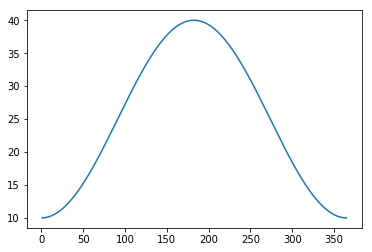

In [30]:
simple_wave = lambda x, a, b: a + b * -(np.cos(2*np.pi * (x/365)))
doy = np.arange(1, 366)



# Hottest day of the year ... finding value and matching with index
print(np.argmax(simple_wave(doy, 25, 15)))



plt.plot(doy, simple_wave(doy, 25, 15))


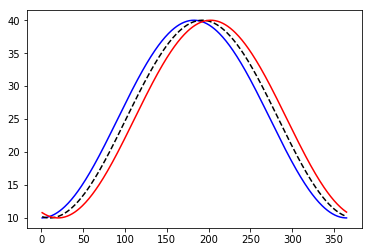

In [36]:
wave = lambda x, a, b, c: a + b * (np.cos(2*np.pi*(x-c)/365 - np.pi))
wave2 = lambda x, a, b, c: a + b * -(np.cos(2*np.pi * ((x-c)/365)))
doy = np.arange(1, 366)

plt.plot(doy, wave(doy, 25, 15, 0), 'b')
plt.plot(doy, wave(doy, 25, 15, 10), '--k')
plt.plot(doy, wave(doy, 25, 15, 20), 'r')

In [40]:
df = pd.read_csv('gypsum_ks_daily_2018.csv')
df.head(5)

,TIMESTAMP,STATION,PRESSUREAVG,PRESSUREMAX,PRESSUREMIN,SLPAVG,TEMP2MAVG,TEMP2MMIN,TEMP2MMAX,TEMP10MAVG,...,SOILTMP10MAX,SOILTMP10MIN,SOILTMP5AVG655,SOILTMP10AVG655,SOILTMP20AVG655,SOILTMP50AVG655,VWC5CM,VWC10CM,VWC20CM,VWC50CM
0,1/1/18 0:00,Gypsum,99.44,100.03,98.73,104.44,-15.15,-19.56,-11.00,-15.31,...,-1.18,-2.45,-1.33,-1.14,0.74,3.50,0.1377,0.1167,0.2665,0.2203
1,1/2/18 0:00,Gypsum,99.79,100.14,99.40,104.88,-16.48,-22.10,-10.40,-16.38,...,-1.56,-3.46,-2.10,-1.82,0.28,3.13,0.1234,0.1021,0.2642,0.2196
2,1/3/18 0:00,Gypsum,98.87,99.52,97.94,103.81,-11.03,-20.64,-2.71,-10.66,...,-1.49,-3.61,-2.21,-1.93,-0.08,2.76,0.1206,0.0965,0.2353,0.2189
3,1/4/18 0:00,Gypsum,98.22,98.54,97.90,102.99,-5.83,-11.79,0.24,-5.01,...,-0.98,-2.67,-1.60,-1.46,-0.21,2.45,0.1235,0.0973,0.2094,0.2182
4,1/5/18 0:00,Gypsum,98.10,98.42,97.75,102.88,-4.73,-14.22,5.36,-4.23,...,-0.72,-2.81,-1.54,-1.38,-0.25,2.25,0.1249,0.0976,0.2047,0.2180


In [42]:
df.TEMP2MAVG.fillna(method='ffill', inplace=True)

12.661945205479444


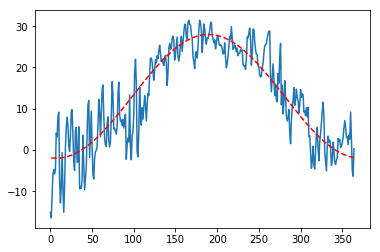

In [51]:
plt.plot(df.TEMP2MAVG)

print(np.mean(df.TEMP2MAVG))

plt.plot(doy, wave(doy, 13, 15, 7), '--r')

In [59]:
par0 = [13,15,7]
lb = [-10, 5, 0]
ub = [15, 15, 365]

par = curve_fit(wave, doy, df.TEMP2MAVG, par0, bounds=(lb, ub))
print(par[0])

[12.6619452  14.81119574 13.45559241]


12.661945205479444


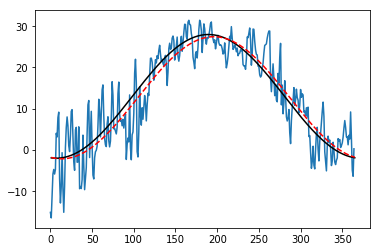

In [61]:
plt.plot(df.TEMP2MAVG)

print(np.mean(df.TEMP2MAVG))

plt.plot(doy, wave(doy, 13, 15, 7), 'k')
plt.plot(doy, wave(doy, *par[0]), '--r')

Mean: 5.508393497801653e-10
Sum: 2.0105638398604242e-07


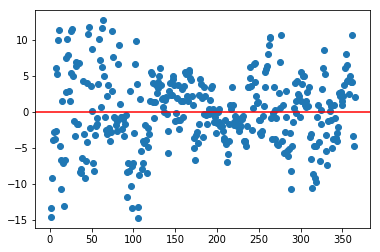

In [74]:
residuals = df.TEMP2MAVG - wave(doy, *par[0])

plt.scatter(doy, residuals)
plt.axhline(np.mean(residuals), color='red')

print('Mean: ' + str(np.mean(residuals)))
print('Sum: ' + str(np.sum(residuals)))